In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import cdsapi
import glob
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import regionmask 

In [12]:
path = os.getcwd()
home_path = os.path.dirname(path)
data_folder = f'{home_path}\\Data'
gis_folder = f'{home_path}\\GIS'

In [13]:
# loading other layers
outline           = gpd.read_file(f"{gis_folder}\\hudson_basin_26918.gpkg",driver="GPKG",crs="EPSG:26918") 
outline_buffered  = gpd.read_file(f"{gis_folder}\\hudson_basin_buffered.gpkg",crs="EPSG:26918")

# fixing crs
for layer in [outline,outline_buffered]:
    layer.geometry = layer.geometry.to_crs("EPSG:4326")

Gleam data from https://www.gleam.eu/#datasets, too large to add to repo so locally extracted

In [15]:
ds_gleam = xr.load_dataset("C:\\Users\\david\\Documents\\EP_data_ENVM1502\\Ep_1980-2022_GLEAM_v3.7a_MO.nc")

In [16]:
mask = regionmask.mask_geopandas(outline_buffered, 
                                 ds['Ep'].lon.to_numpy(), 
                                 ds['Ep'].lat.to_numpy(),
                                 lon_name="lon",
                                 lat_name="lat")

In [17]:
cropped_ds_gleam = ds_gleam.where(mask==0)

In [32]:
mean_gleam = cropped_ds_gleam.mean(dim=["lat","lon"])

In [48]:
df_gleam = pd.DataFrame(mean_gleam.Ep.to_pandas(),columns=["Pe"])
df_gleam.index.name="Monthly sum evap"

In [51]:
df_gleam.to_parquet(f'{home_path}\\Data\\EP\\GLEAM.parquet')

In [58]:
df_gleam

,Pe
Monthly sum evap,
1980-01-31,10.423717
1980-02-29,12.386091
1980-03-31,31.808714
1980-04-30,61.457024
1980-05-31,88.047867
...,...
2022-08-31,104.202904
2022-09-30,80.421959
2022-10-31,51.670513


(480.0, 540.0)

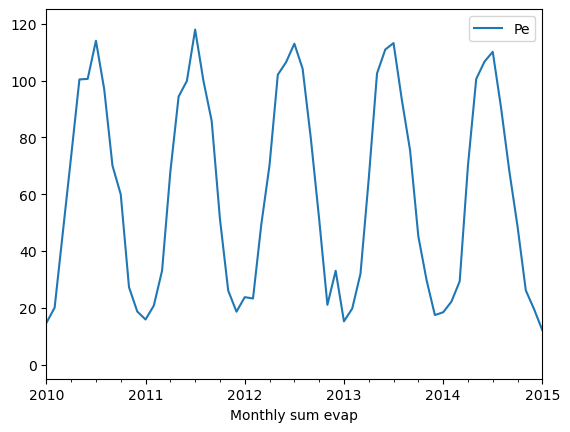

In [57]:
fig, ax = plt.subplots(1)
df_gleam.plot(ax=ax)
ax.set_xlim(("2010","2015"))